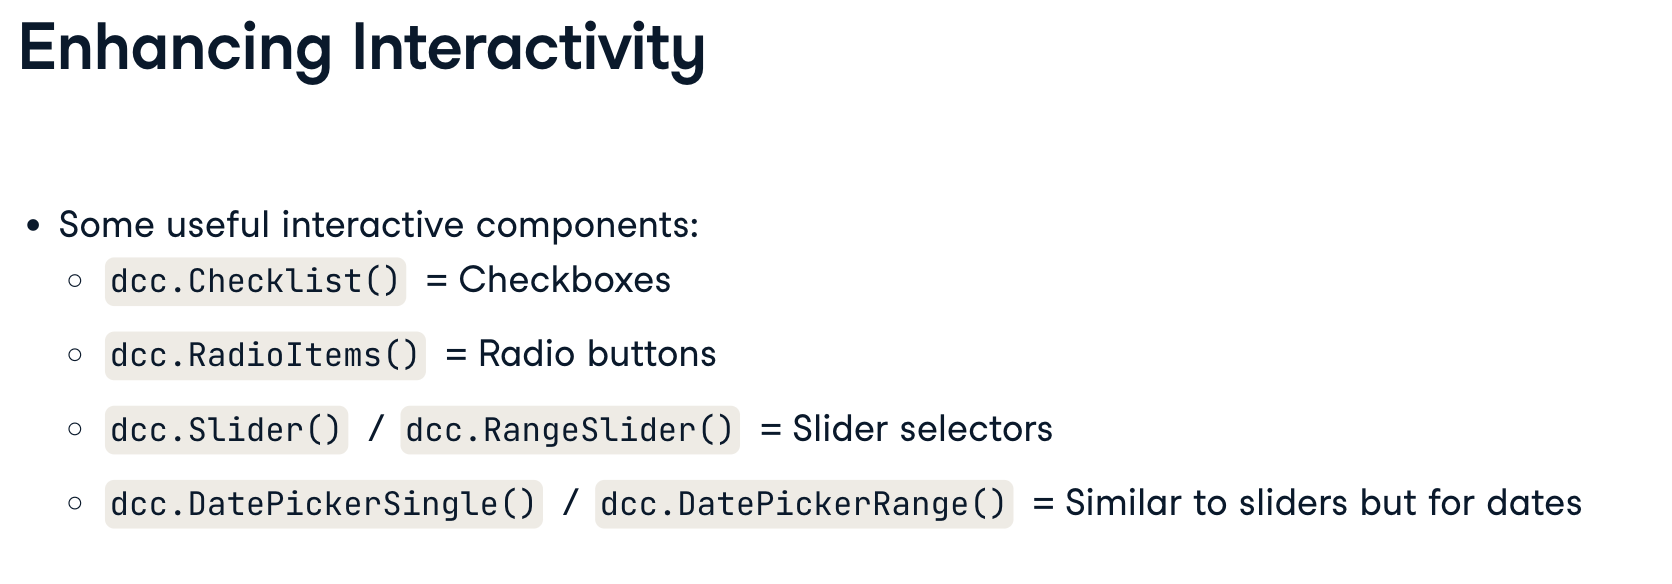

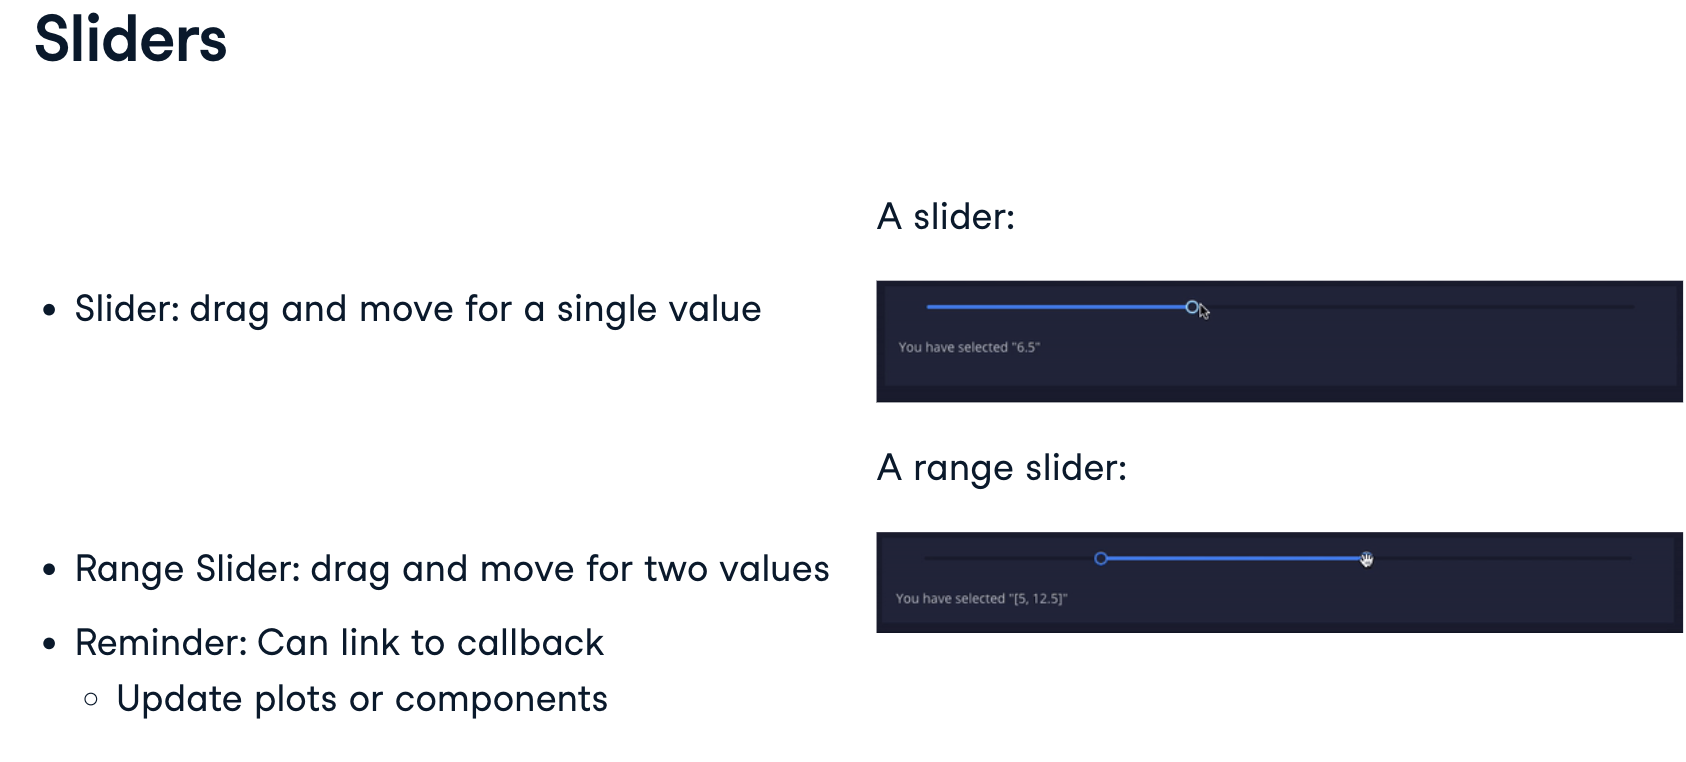

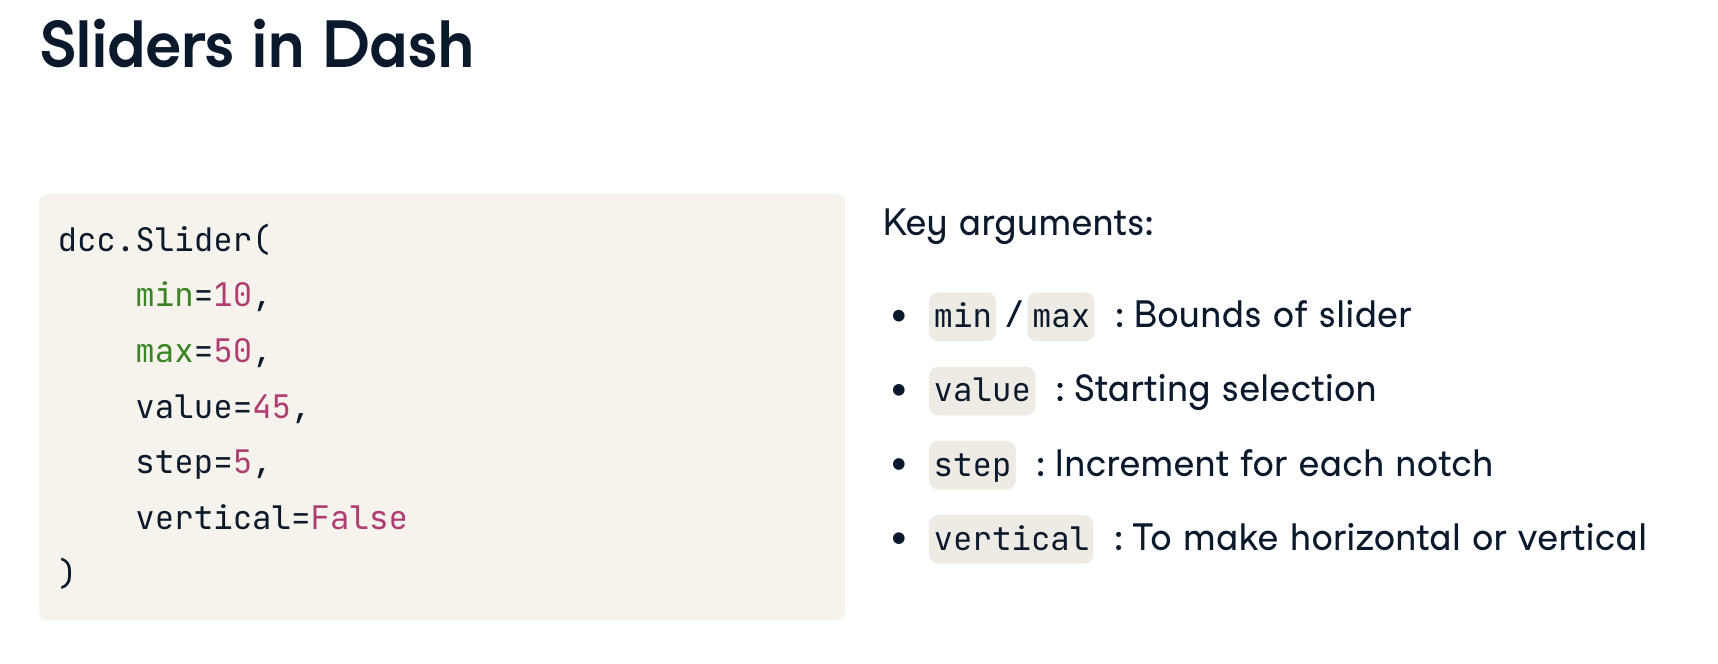

In [ ]:
        # Add a slider input
        dcc.Slider(id='value_slider',
            # Set the min and max of the slider
            min=ecom_sales['OrderValue'].min(),
            max=ecom_sales['OrderValue'].max(),
            # Start the slider at 0
            value = 0,
            # Increment the slider by 50 each notch
            step = 50,
            vertical=False)
        ],

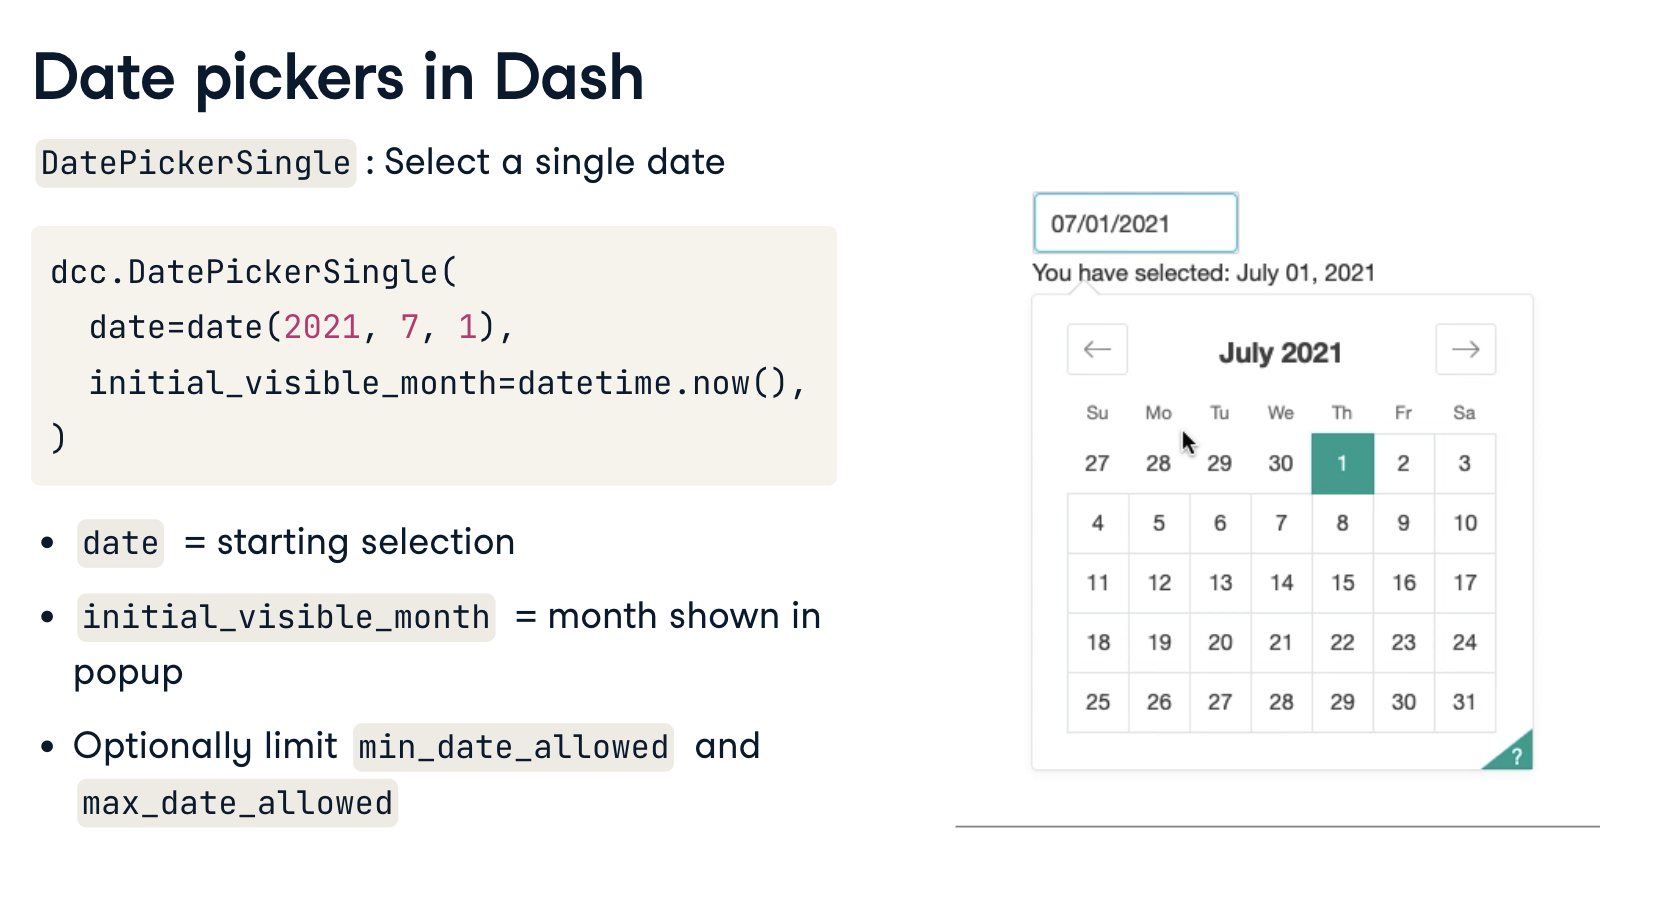

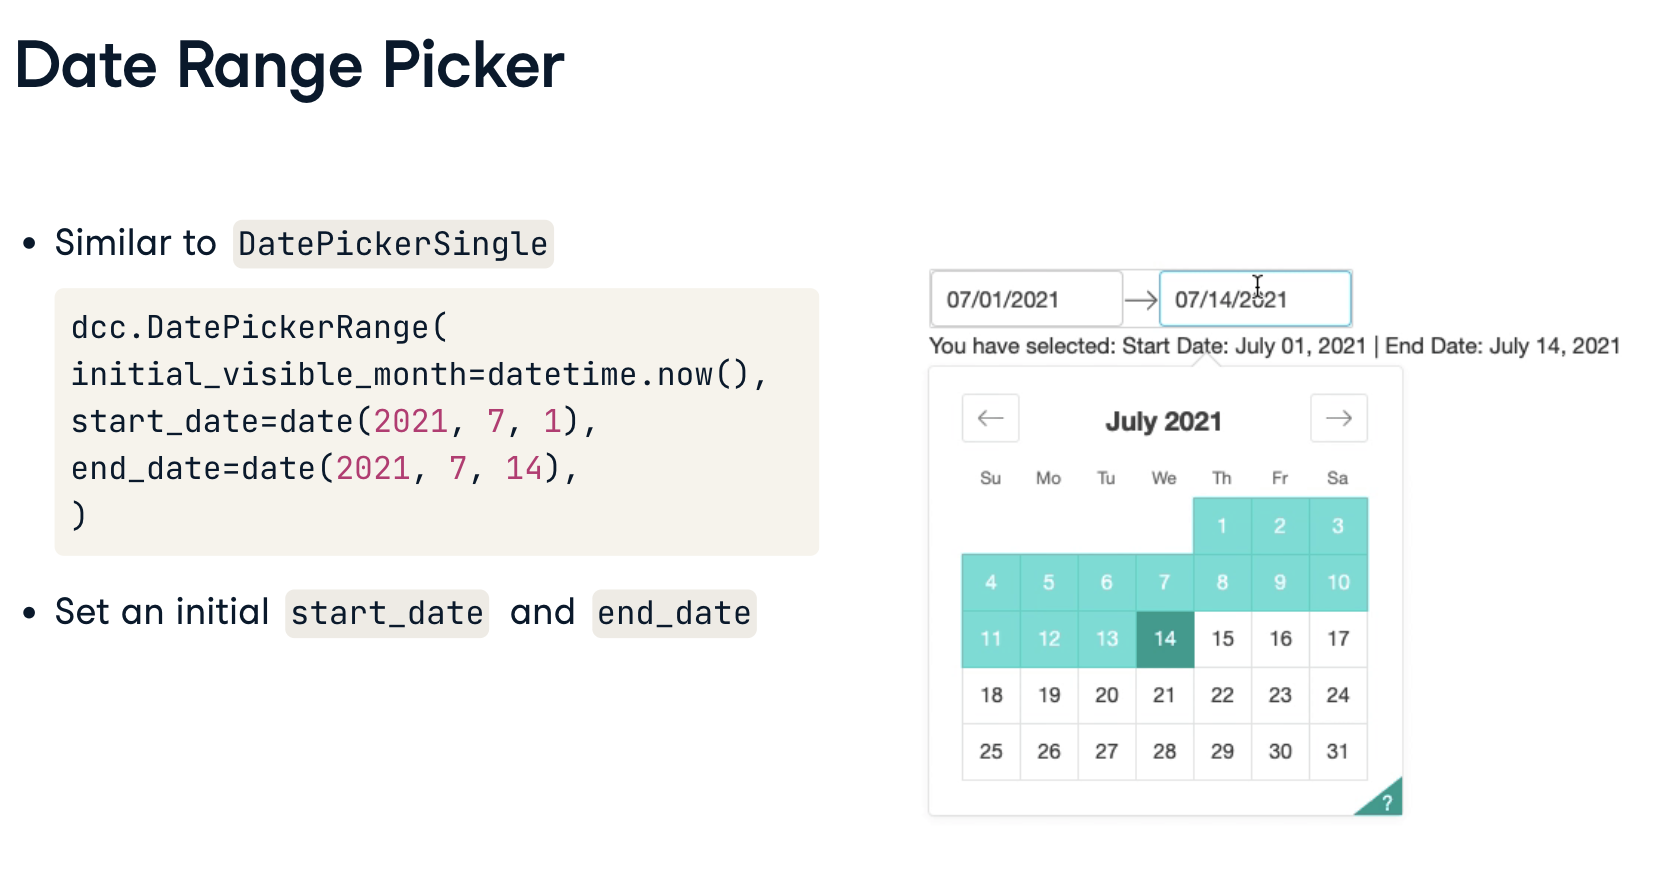

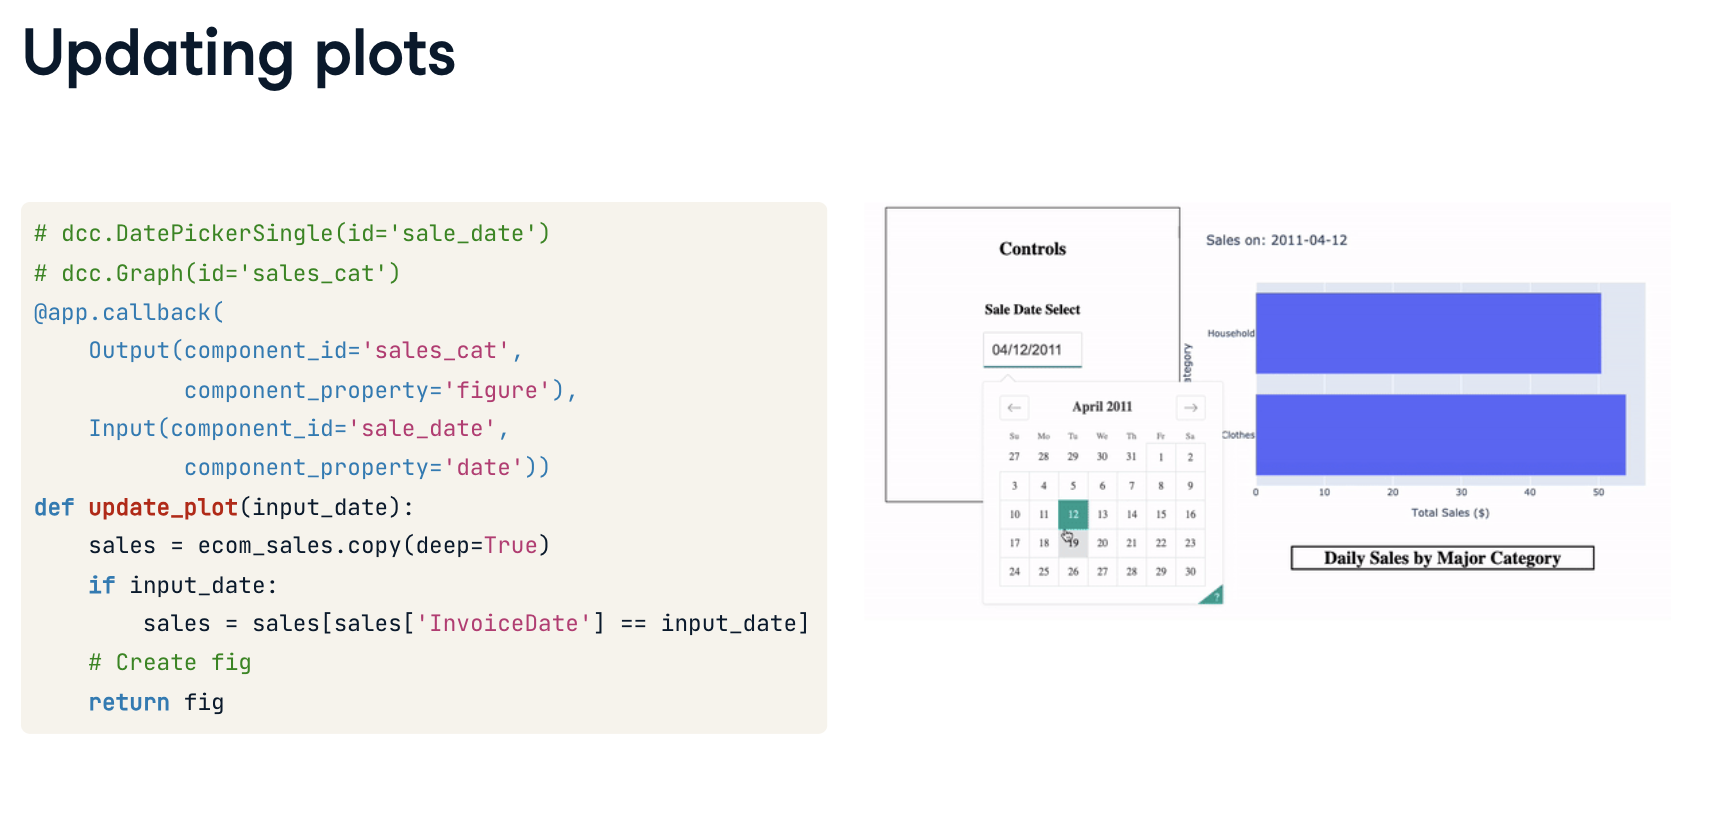

## Exercise 
Date picker for sales data
The interactive sales dashboard you created was a smash hit; however, it is vital for the sales team to be able to monitor daily sales to analyze patterns and trends. You have been asked if you can extend your work to include a filter to view sales by major category on a particular date?

This sounds like a job for a date picker! You are definitely able to assist with the brief.

In [10]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
from datetime import datetime, date

# Sample data
data = {
    'InvoiceDate': ['2023-09-01', '2023-09-01', '2023-09-02', '2023-09-02', '2023-09-03'],
    'Major Category': ['Clothes', 'Kitchen', 'Garden', 'Household', 'Clothes'],
    'Minor Category': ['Shirts', 'Cookware', 'Tools', 'Cleaning', 'Dresses'],
    'OrderValue': [15000, 18000, 22000, 20000, 24000],
}
# Create a DataFrame
ecom_sales = pd.DataFrame(data)

# Convert 'InvoiceDate' column to datetime format
ecom_sales['InvoiceDate'] = pd.to_datetime(ecom_sales['InvoiceDate'])
logo_link = 'logo.png'
ecom_sales['InvoiceDate'] = pd.to_datetime(ecom_sales['InvoiceDate'])

app = dash.Dash(__name__)

app.layout = html.Div([
  html.Img(src=logo_link, 
        style={'margin':'30px 0px 0px 0px' }),
  html.H1('Sales breakdowns'),
    
  html.Div(
    children=[
        
    html.Div(
        children=[
        html.H2('Controls'),
        html.Br(),
        html.H3('Sale Date Select'),
            
        # Create a single date picker with identifier
        dcc.DatePickerSingle(id='sale_date',
            # Set the min/max dates allowed as the min/max dates in the DataFrame
            min_date_allowed=ecom_sales['InvoiceDate'].min(),
            max_date_allowed=ecom_sales['InvoiceDate'].max(),
            # Set the initial visible date
            date=date(2023,8,11),
            initial_visible_month=date(2023,8,11),
            style={'width':'200px', 'margin':'0 auto'})
        ],
        style={'width':'350px', 'height':'350px', 'display':'inline-block', 'vertical-align':'top', 'border':'1px solid black', 'padding':'5px'}),
        
    html.Div(children=[
      		# Add a component to render a Plotly figure with the specified id
            dcc.Graph('sales_cat'),
            html.H2('Daily Sales by Major Category', 
            style={ 'border':'2px solid black', 'width':'400px', 'margin':'0 auto'})
            ],
             style={'width':'700px','display':'inline-block'}
             ),
    ]),
    ], 
  style={'text-align':'center', 'display':'inline-block', 'width':'100%'}
  )

@app.callback(
    Output(component_id='sales_cat', component_property='figure'),
    Input(component_id='sale_date', component_property='date')
)
def update_plot(input_date):
    
    sales = ecom_sales.copy(deep=True)
    if input_date:
        sales = sales[sales['InvoiceDate'] == input_date]
        
    ecom_bar_major_cat = sales.groupby('Major Category')['OrderValue'].agg('sum').reset_index(name='Total Sales ($)')
    
    bar_fig_major_cat = px.bar(
        title=f'Sales on: {input_date}',data_frame=ecom_bar_major_cat, orientation='h', 
        x='Total Sales ($)', y='Major Category')

    return bar_fig_major_cat


if __name__ == '__main__':
    app.run_server(port=60305, debug=True)